In [ ]:
#!pip install pgmpy
import numpy as np
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('heart_failure.csv')
heartfailure = df.replace('?', np.nan)
print('Few examples from the dataset are given below')
print(heartfailure.head())

Few examples from the dataset are given below
    age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]


In [ ]:
model = BayesianModel([('age', 'DEATH_EVENT'),('smoking', 'diabetes'),('diabetes', 'DEATH_EVENT'),('high_blood_pressure', 'DEATH_EVENT'),('anaemia', 'platelets'),('anaemia', 'DEATH_EVENT')])



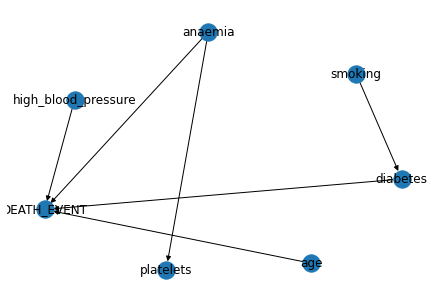

In [ ]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()

In [ ]:
model.local_independencies('anaemia')
model.local_independencies('age')
model.get_independencies()


(age _|_ high_blood_pressure, platelets, diabetes, smoking, anaemia)
(age _|_ high_blood_pressure, diabetes, anaemia, smoking | platelets)
(age _|_ platelets, diabetes, anaemia, smoking | high_blood_pressure)
(age _|_ platelets, high_blood_pressure, anaemia, smoking | diabetes)
(age _|_ platelets, high_blood_pressure, diabetes, anaemia | smoking)
(age _|_ platelets, high_blood_pressure, diabetes, smoking | anaemia)
(age _|_ smoking | DEATH_EVENT, diabetes)
(age _|_ platelets | DEATH_EVENT, anaemia)
(age _|_ diabetes, smoking, anaemia | platelets, high_blood_pressure)
(age _|_ high_blood_pressure, smoking, anaemia | platelets, diabetes)
(age _|_ high_blood_pressure, diabetes, anaemia | platelets, smoking)
(age _|_ high_blood_pressure, diabetes, smoking | platelets, anaemia)
(age _|_ platelets, smoking, anaemia | high_blood_pressure, diabetes)
(age _|_ platelets, diabetes, anaemia | high_blood_pressure, smoking)
(age _|_ platelets, diabetes, smoking | high_blood_pressure, anaemia)
(age _

In [ ]:
print('\nLearning CPDs using Maximum Likelihood Estimators...');
# Learing CPDs using Maximum Likelihood Estimators 
model.fit(heartfailure, estimator=MaximumLikelihoodEstimator) 
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))



Learning CPDs using Maximum Likelihood Estimators...
CPD of DEATH_EVENT:
CPD of age:
CPD of anaemia:
CPD of diabetes:
CPD of high_blood_pressure:
CPD of platelets:
CPD of smoking:


In [ ]:
print(model.get_cpds('age'))

print(model.get_cpds('smoking'))

print(model.get_cpds('high_blood_pressure'))



+-------------+------------+
| age(40.0)   | 0.0234114  |
+-------------+------------+
| age(41.0)   | 0.00334448 |
+-------------+------------+
| age(42.0)   | 0.0234114  |
+-------------+------------+
| age(43.0)   | 0.00334448 |
+-------------+------------+
| age(44.0)   | 0.00668896 |
+-------------+------------+
| age(45.0)   | 0.0635452  |
+-------------+------------+
| age(46.0)   | 0.0100334  |
+-------------+------------+
| age(47.0)   | 0.00334448 |
+-------------+------------+
| age(48.0)   | 0.00668896 |
+-------------+------------+
| age(49.0)   | 0.0133779  |
+-------------+------------+
| age(50.0)   | 0.090301   |
+-------------+------------+
| age(51.0)   | 0.0133779  |
+-------------+------------+
| age(52.0)   | 0.0167224  |
+-------------+------------+
| age(53.0)   | 0.0334448  |
+-------------+------------+
| age(54.0)   | 0.00668896 |
+-------------+------------+
| age(55.0)   | 0.0568562  |
+-------------+------------+
| age(56.0)   | 0.00334448 |
+-------------

In [ ]:
print('\nInferencing with Bayesian Network:')
HeartFailure_infer = VariableElimination(model)



Inferencing with Bayesian Network:


In [ ]:
print('\n1.Probability of Heartfailure given diabetes:0')
q = HeartFailure_infer.query(variables=['DEATH_EVENT'],evidence={'diabetes':0,'smoking':1})
print(q)

Eliminating: anaemia: 100%|██████████| 4/4 [00:00<00:00, 301.92it/s]


1.Probability of Heartfailure given diabetes:0
+----------------+--------------------+
| DEATH_EVENT    |   phi(DEATH_EVENT) |
+================+====================+
| DEATH_EVENT(0) |             0.6540 |
+----------------+--------------------+
| DEATH_EVENT(1) |             0.3460 |
+----------------+--------------------+
